<a href="https://colab.research.google.com/github/Ashishjames/Heart-Disease-Classification/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier, plot_importance

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")




In [2]:
#importing file from local drive
from google.colab import files

files=files.upload()

Saving heart-disease.csv to heart-disease (2).csv


In [3]:
#reading the file
df=pd.read_csv('heart-disease.csv')

In [4]:
#top 5 rows 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#last 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#checking the dimension
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
#Statistcal insights
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#checking for missing or null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

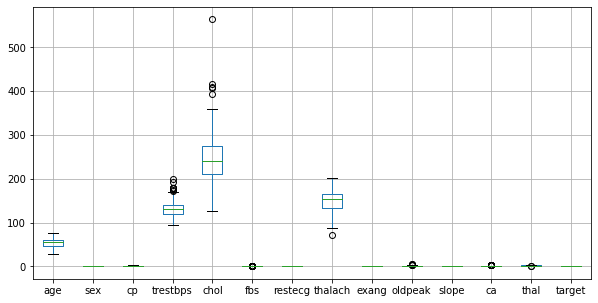

In [11]:
#checking for outliers
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age


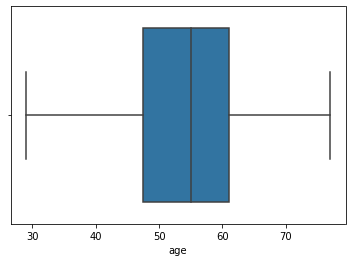

sex


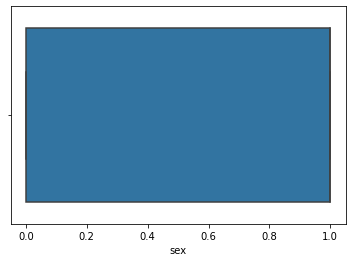

cp


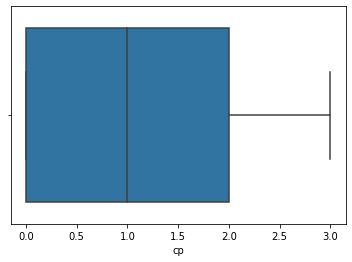

trestbps


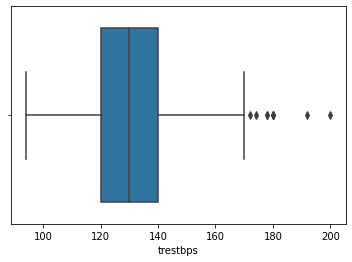

chol


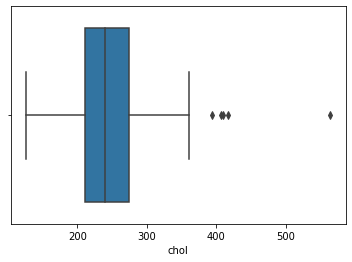

fbs


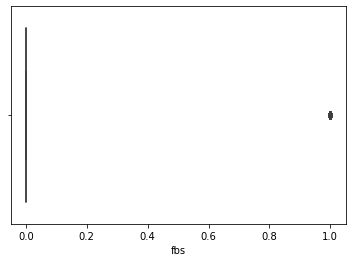

restecg


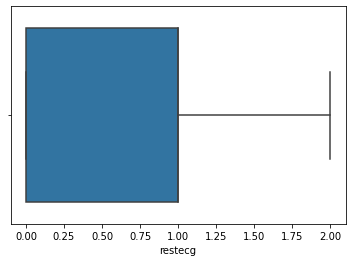

thalach


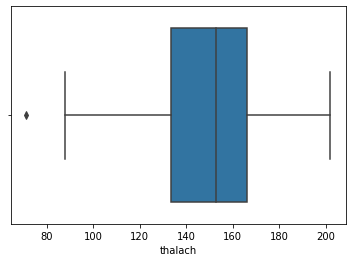

exang


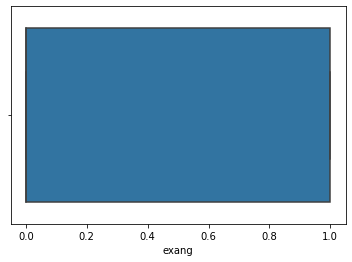

oldpeak


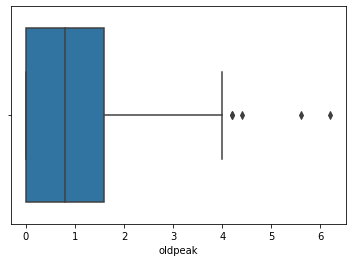

slope


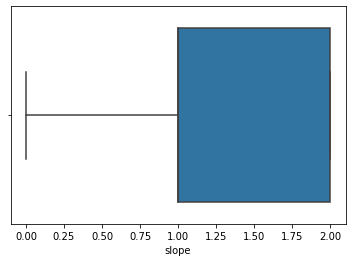

ca


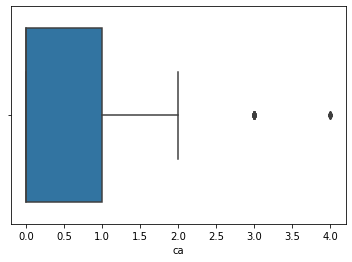

thal


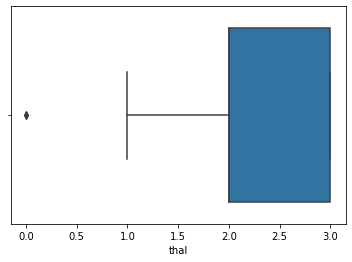

target


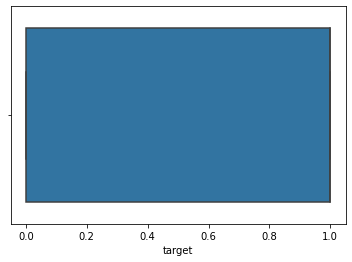

In [13]:
#outlier detection
col=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for i in range(len(col)):
  print(col[i])
  sns.boxplot(df[col[i]])
  plt.show()

In [14]:
#checking for co-relation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


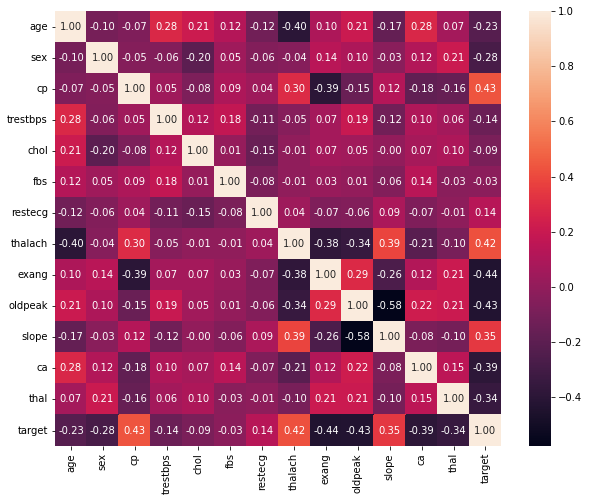

In [15]:
#visualizing co-relation for better understanding
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

#Data Visualization

In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

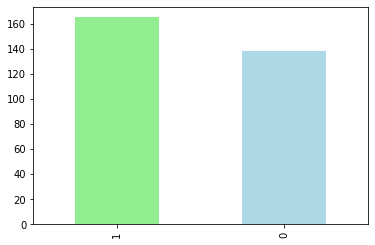

In [17]:
df["target"].value_counts().plot(kind="bar", color=["lightgreen", "lightblue"]);

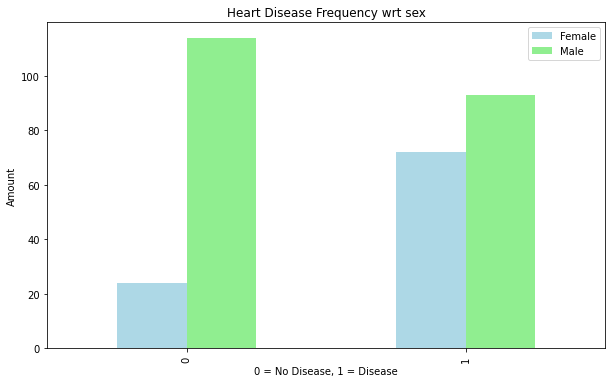

In [18]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue", "lightgreen"])
plt.title("Heart Disease Frequency wrt sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

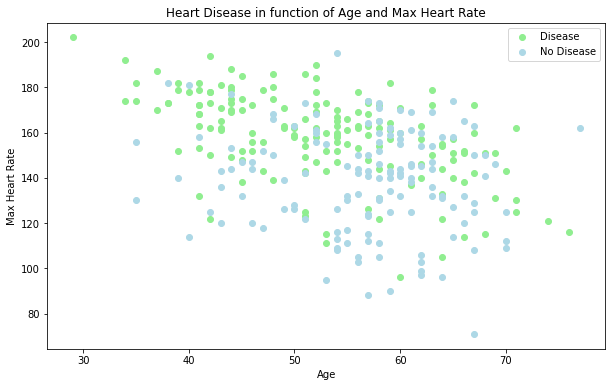

In [19]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="lightgreen")

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

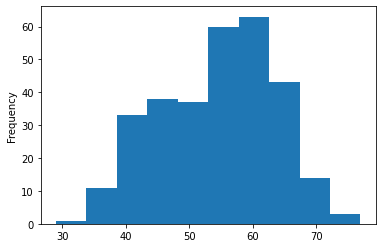

In [20]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

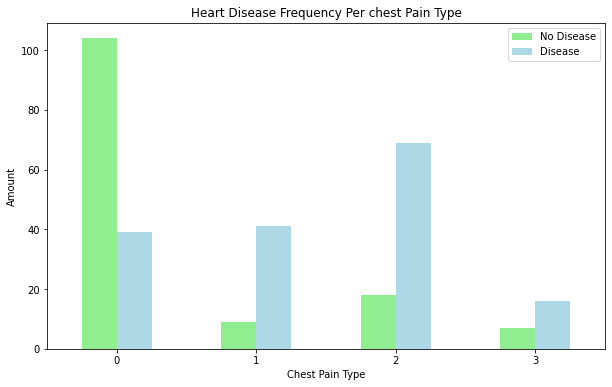

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["lightgreen", "lightblue"])

plt.title("Heart Disease Frequency Per chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

#Modelling

In [22]:
#splitting data for training and testing
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [25]:
#model evaluation
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier(),
          AdaBoostClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

for i in range(6):
  np.random.seed(42)
  models[i].fit(X_train, y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', accuracy_score(y_train, models[i].predict(X_train)))
  print('Validation Accuracy : ', accuracy_score(y_test, models[i].predict(X_test)))
  print()

LogisticRegression() : 
Training Accuracy :  0.8553719008264463
Validation Accuracy :  0.8852459016393442

XGBClassifier() : 
Training Accuracy :  0.9834710743801653
Validation Accuracy :  0.8524590163934426

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.8360655737704918

AdaBoostClassifier() : 
Training Accuracy :  0.9380165289256198
Validation Accuracy :  0.8032786885245902

DecisionTreeClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.7540983606557377

KNeighborsClassifier() : 
Training Accuracy :  0.7603305785123967
Validation Accuracy :  0.6885245901639344



From above results, logistic regression validation accuracy > training accuracy which is not a good sign.

In [26]:
#scaling the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
#scaled data in the range [-1,1]
X_train_scaled

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

In [28]:
#model evaluation on scaled data
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier(),
          AdaBoostClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

for i in range(6):
  np.random.seed(42)
  models[i].fit(X_train_scaled, y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy(scaled data) : ', accuracy_score(y_train, models[i].predict(X_train_scaled)))
  print('Validation Accuracy(scaled data) : ', accuracy_score(y_test, models[i].predict(X_test_scaled)))
  print()

LogisticRegression() : 
Training Accuracy(scaled data) :  0.8636363636363636
Validation Accuracy(scaled data) :  0.8524590163934426

XGBClassifier() : 
Training Accuracy(scaled data) :  0.9834710743801653
Validation Accuracy(scaled data) :  0.8524590163934426

RandomForestClassifier() : 
Training Accuracy(scaled data) :  1.0
Validation Accuracy(scaled data) :  0.8360655737704918

AdaBoostClassifier() : 
Training Accuracy(scaled data) :  0.9380165289256198
Validation Accuracy(scaled data) :  0.8032786885245902

DecisionTreeClassifier() : 
Training Accuracy(scaled data) :  1.0
Validation Accuracy(scaled data) :  0.7540983606557377

KNeighborsClassifier() : 
Training Accuracy(scaled data) :  0.8553719008264463
Validation Accuracy(scaled data) :  0.9016393442622951



The logistic Regression problem has been solved but now KNeighborsClassifier is showing the same error as logistic regression in the previous case.

#Model Comparison

In [29]:
#top 4 models
accu=pd.DataFrame({'Training_accuracy':[0.9834710743801653, 0.9380165289256198 , 1.0, 1.0], 
                   'Testing_accuracy':[0.8524590163934426, 0.8032786885245902, 0.7540983606557377, 0.8360655737704918]},
                   index =['Xgbclassifier', 'Adaboost', 'DecisionTree', 'Randomforest'])  
accu.head()

,Training_accuracy,Testing_accuracy
Xgbclassifier,0.983471,0.852459
Adaboost,0.938017,0.803279
DecisionTree,1.000000,0.754098
Randomforest,1.000000,0.836066


<Figure size 720x576 with 0 Axes>

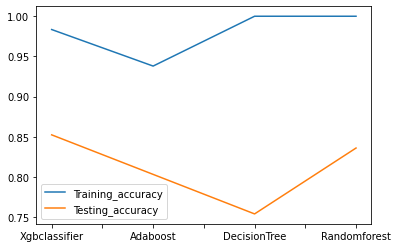

In [30]:
plt.figure(figsize=(10,8))
accu.plot()
plt.show()

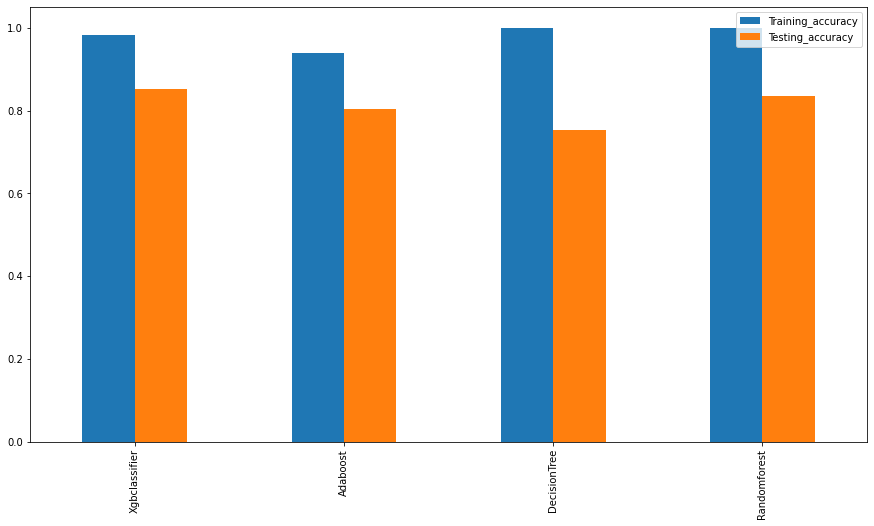

In [31]:
accu.plot(kind='bar',figsize =(15, 8))

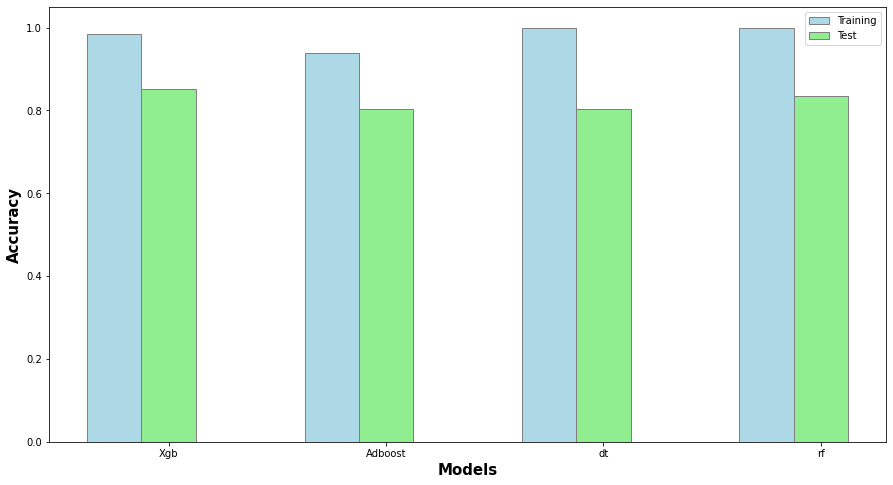

In [32]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(15, 8))

# set height of bar
train_accu =[0.9834710743801653, 0.9380165289256198 , 1.0, 1.0] 
test_accu =[0.8524590163934426, 0.8032786885245902, 0.8032786885245902, 0.8360655737704918]

# Set position of bar on X axis
br1 = np.arange(len(train_accu))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_accu, color ='lightblue', width = barWidth,
		edgecolor ='grey', label ='Training')
plt.bar(br2, test_accu, color ='lightgreen', width = barWidth,
		edgecolor ='grey', label ='Test')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_accu))],
		['Xgb', 'Adboost', 'dt', 'rf'])

plt.legend()
plt.show()


#Classification report

In [33]:
#function to show classification report
def score(model,title):
  np.random.seed(42)
  model.fit(X_train,y_train)
  test_pred=model.predict(X_test)
  print('Accuracy: ',accuracy_score(y_test,test_pred))
  print(title,':\n',classification_report(y_test,test_pred))
  

In [34]:
score(XGBClassifier(),'XGBClassifier')

Accuracy:  0.8524590163934426
XGBClassifier :
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [35]:
score(AdaBoostClassifier(),'AdaBoostClassifier')

Accuracy:  0.8032786885245902
AdaBoostClassifier :
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [36]:
score(DecisionTreeClassifier(),'DecisionTreeClassifier')

Accuracy:  0.7540983606557377
DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [37]:
score(RandomForestClassifier(),'RandomForestClassifier')

Accuracy:  0.8360655737704918
RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



From the above Observations,  XGBClassifier & RandomForestClasssifier seems to be the best optimal models for this data.

#Hyperparameter tuning

In [38]:
rfc= RandomForestClassifier()
xgb= XGBClassifier()

###Using RandomizedSearchCV

* RandomForestClassifier()



In [39]:
random_grid={'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60,70, 80, 90, 100, 110,None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800,1000, 1200, 1400, 1600,1800, 2000]}

rf_random = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 5, cv = 3, verbose=2, random_state=2002, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=2002, verbose=2)

In [40]:
print('Best parameters: ', rf_random.best_params_)
print('Best score: ',  rf_random.best_score_)

Best parameters:  {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}
Best score:  0.8017489711934157


* XGBClassifier()

In [41]:
params={'learning_Rate': [0.001,0.01,0.1,0.25,0.5,0.4],
        'max_depth': [1,2,3,4,5,6],
        'max_features': [1,2,3,4,5,6],
        'n_estimators': [20,40,50,70,100]}


Xgb_random= RandomizedSearchCV(xgb,param_distributions=params,
                                          n_iter=5,
                                          cv=5,
                                          n_jobs=-1,
                                          verbose=0)
Xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_Rate': [0.001, 0.01, 0.1,
                                                          0.25, 0.5, 0.4],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'max_features': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [20, 40, 50, 70, 100]})

In [42]:
print('Best parameters: ', Xgb_random.best_params_)
print('Best score: ', Xgb_random.best_score_)

Best parameters:  {'n_estimators': 100, 'max_features': 5, 'max_depth': 3, 'learning_Rate': 0.1}
Best score:  0.8098639455782314


###Using GridSearchCV

* RandomForestClassifier()

In [43]:
grid = {'min_samples_leaf':[1,2,3],
        'min_samples_split':[4,5,6,7],
        'n_estimators':[150,200,250,300,350],
        'bootstrap':[False],
        'max_features':['sqrt']}

rf_grid = GridSearchCV(estimator = rfc,
                       param_grid = grid,
                       cv = 3, 
                       verbose=3,
                       n_jobs=-1)

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [150, 200, 250, 300, 350]},
             verbose=3)

In [44]:
print('Best_parameters: ', rf_grid.best_params_)
print('Best_score: ', rf_grid.best_score_)

Best_parameters:  {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best_score:  0.810082304526749


* XGBClassifier()

In [45]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]}

Xgb_grid = GridSearchCV(xgb, 
                        params, 
                        n_jobs=-1, 
                        cv=KFold(n_splits=3), 
                        scoring='roc_auc')

Xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'base_score': [0.2, 0.5, 1],
                         'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.5, 1, 5]},
             scoring='roc_auc')

In [46]:
print('Best score:', Xgb_grid.best_score_)
print('Best parameters:', Xgb_grid.best_params_)

Best score: 0.8879920575461053
Best parameters: {'base_score': 0.5, 'booster': 'gblinear', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1}


#Confusion Matrix


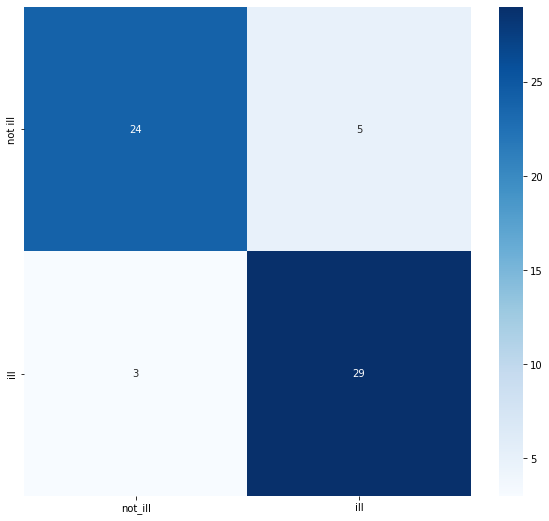

In [47]:
# XGBClassifier
Xgb_grid_preds=Xgb_grid.predict(X_test)
confusion_matr = confusion_matrix(y_test, Xgb_grid_preds)
plt.figure(figsize = (10, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, xticklabels=['not_ill','ill'],yticklabels=['not ill','ill'],)

#Feature importance

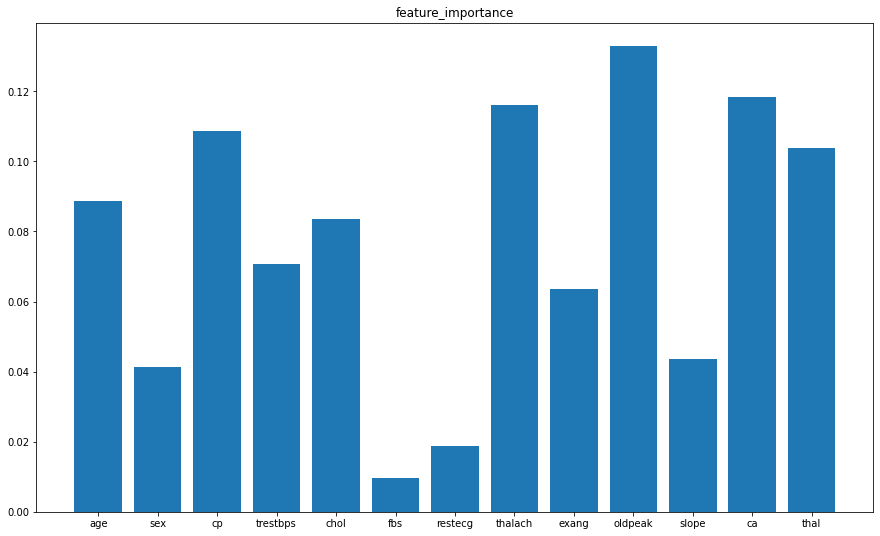

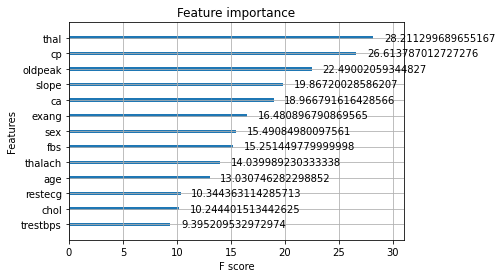

In [48]:
rfc.fit(X_train,y_train)
xgb.fit(X_train,y_train)
plt.figure(figsize=(15,9))
plt.title('feature_importance')
plt.bar(X.columns,rfc.feature_importances_)
plt.show()
plot_importance(xgb,importance_type='cover',)

#Downloading the prediction file

In [49]:
from google.colab import files
prediction = pd.DataFrame({"Target": Xgb_grid.predict(X_test)})
prediction.to_csv('prediction.csv', index=False)
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>